# **Algoritmos - Laboratorio 6**

Nombre: Jonathan Andrés Jiménez Trujillo


### **Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh** 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

In [1]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

1. Plot the following function in an x range that include the vertex and the roots (if there are roots).

- $x^2$

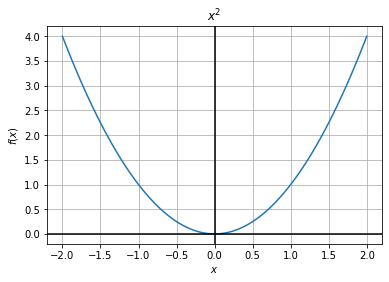

In [2]:
def f1(x):
    return x*x

x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f1(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('$x^2$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show();

- $(x-1)^2$

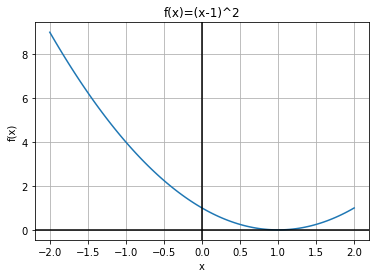

In [3]:
def f2(x):
    return (x-1)*(x-1)

x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f2(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=(x-1)^2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show();

- $x^2-1$

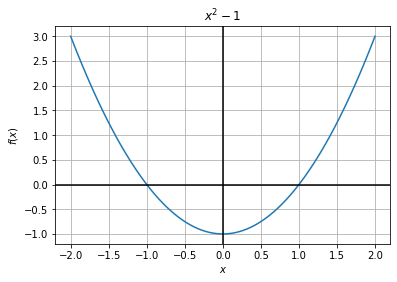

In [4]:
def f3(x):
    return x*x-1

x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f3(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('$x^2-1$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show();

- $x^2+1$

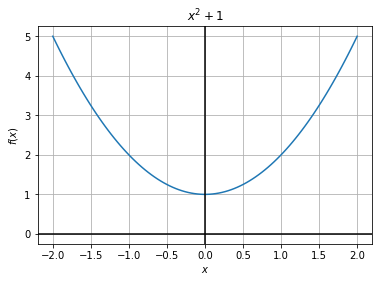

In [5]:
def f4(x):
    return x*x+1

x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f4(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('$x^2+1$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show();

2. Apply the Classic and Po Shen Loh's methods for solving the following quadratic equations.


In [6]:
def classic(coef):
    a = coef[0]
    b = coef[1]
    c = coef[2]
    roots = []
    if (b*b-4*a*c) < 0:
        return None
    roots.append((-b + m.sqrt(b*b-4*a*c))/(2*a))
    roots.append((-b - m.sqrt(b*b-4*a*c))/(2*a))
    return roots

def po_shen_loh(coef):
    a = coef[0]
    b = coef[1]
    c = coef[2]
    roots = []
    if (b*b/2 - c) < 0:
        return None
    u = m.sqrt(b*b/4 - c)
    roots.append(-b/2 + u)
    roots.append(-b/2 - u)
    return roots

def qdr_solve(coef):
    if (classic(coef) is not None):
        print("Classic method: \t",classic(coef)[0],",",classic(coef)[1])
        print("Po-Shen Lo's method:\t",po_shen_loh(coef)[0],",",po_shen_loh(coef)[1])
    else:
        print("No roots found")

- $x^2=0$

In [22]:
qdr_solve([1,0,0])

Classic method: 	 0.0 , 0.0
Po-Shen Lo's method:	 0.0 , 0.0


- $(x-1)^2$

In [23]:
qdr_solve([1,-2,1])

Classic method: 	 1.0 , 1.0
Po-Shen Lo's method:	 1.0 , 1.0


- $x^2-1$

In [24]:
qdr_solve([1,0,-1])

Classic method: 	 1.0 , -1.0
Po-Shen Lo's method:	 1.0 , -1.0


- $x^2+1$

In [25]:
qdr_solve([1,0,1])

No roots found


3. Plot the newton fractals for the corresponding complex quadratic polynomials

In [28]:
def f(z):
    return z*z

def df(z):
    return 2*z

def newton_set(r1, r2, mult, z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 15

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    #znext = z - f(z) / dz # Newton iteration
                    znext = z - mult*f(z) / dz #m multiplicidad

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display_fractal(func_str,r1, r2, mult, z_c_r=0, z_c_i=0, zh = 1, zw=1, width=750, height=750, zoom=1, niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set(r1, r2, mult, z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom, niter=niter)
    fig, ax = plt.subplots(figsize=(7, 7))    
    plt.title('$f(z)=$'+func_str)
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    ax.imshow(pimg, interpolation='nearest')
    plt.tight_layout();

- $z^2$

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )
Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )
Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )
Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


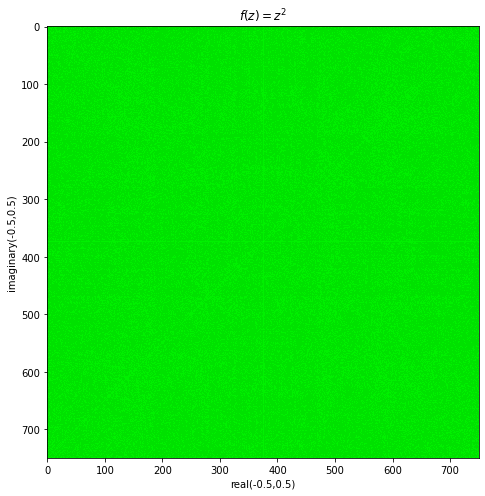

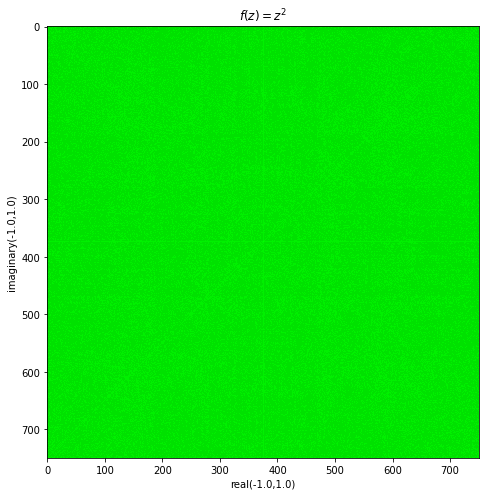

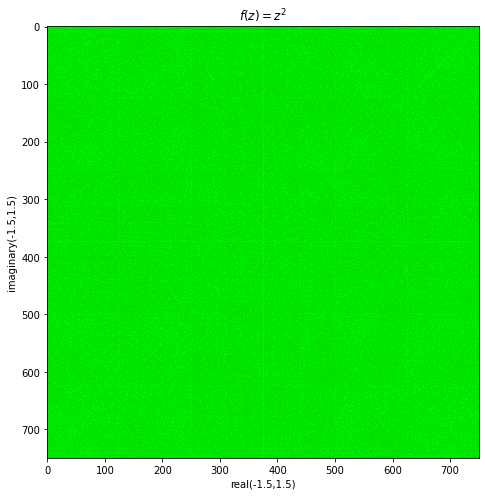

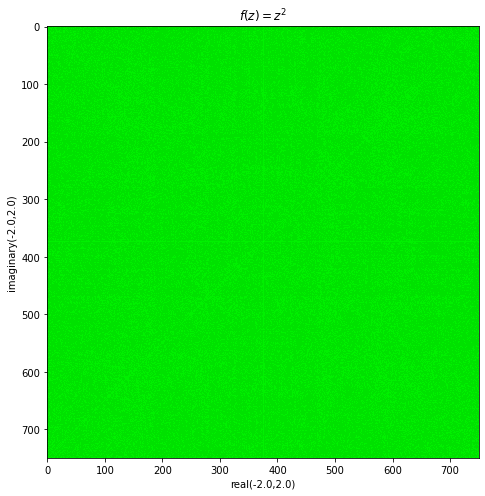

In [30]:
def f(z):
    return z*z

def df(z):
    return 2*z

display_fractal('$z^2$',0,0,2)
display_fractal('$z^2$',0,0,2,zoom=2)
display_fractal('$z^2$',0,0,2,zoom=3)
display_fractal('$z^2$',0,0,2,zoom=4)

- $(z-1)^2$

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )
Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )
Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )
Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


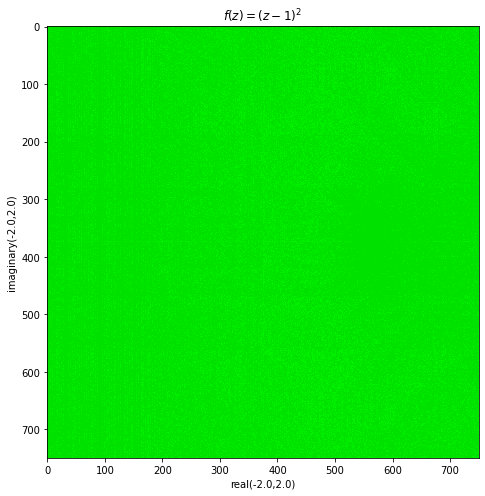

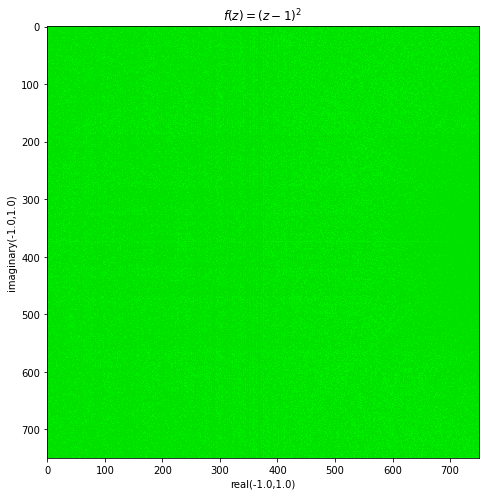

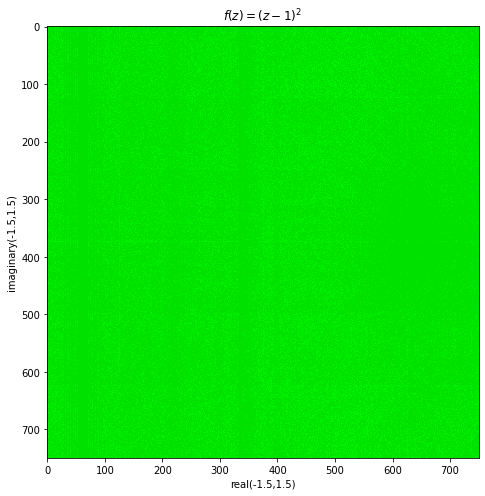

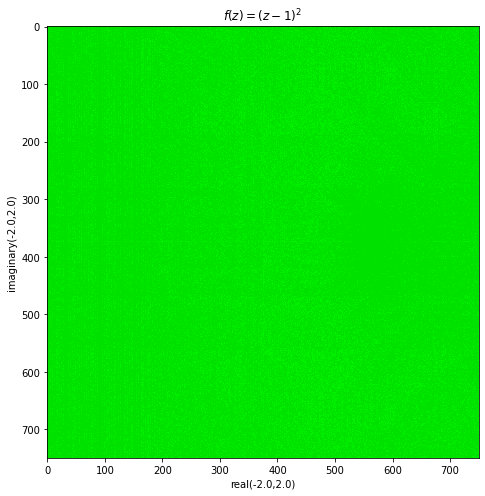

In [31]:
def f(z):
    return z*z-2*z+1

def df(z):
    return 2*z-2

display_fractal('$(z-1)^2$',1,1,2,zoom=1)
display_fractal('$(z-1)^2$',1,1,2,zoom=2)
display_fractal('$(z-1)^2$',1,1,2,zoom=3)
display_fractal('$(z-1)^2$',1,1,2,zoom=4)

- $z^2-1$

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )
Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )
Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )
Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


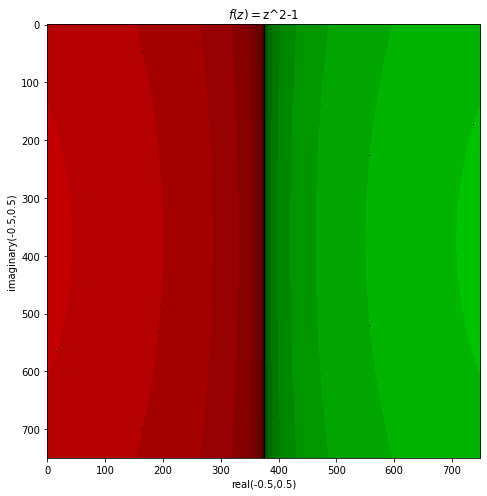

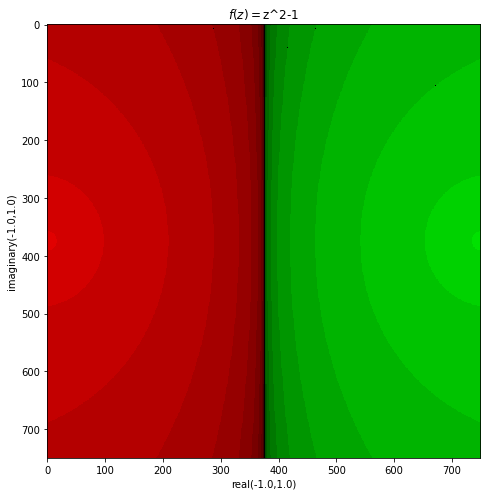

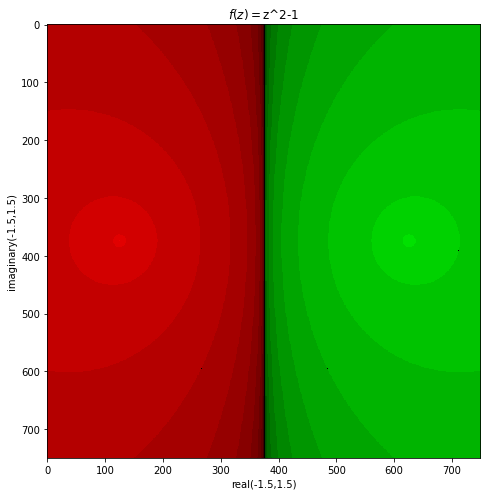

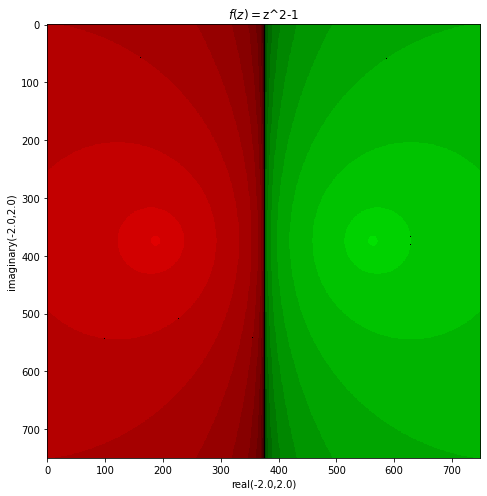

In [32]:
def f(z):
    return z*z-1

def df(z):
    return 2*z

display_fractal('z^2-1',1,-1,1,zoom=1)
display_fractal('z^2-1',1,-1,1,zoom=2)
display_fractal('z^2-1',1,-1,1,zoom=3)
display_fractal('z^2-1',1,-1,1,zoom=4)

- $z^2+1$

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )
Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )
Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )
Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


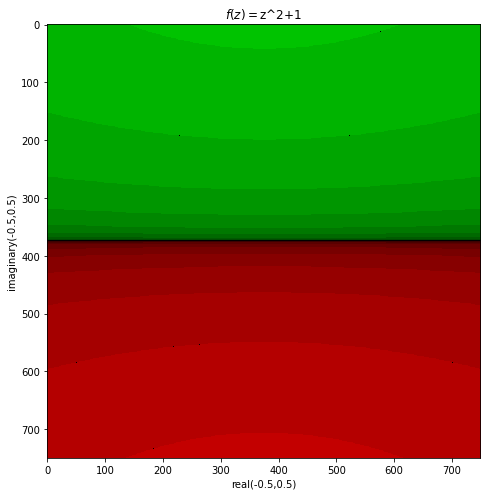

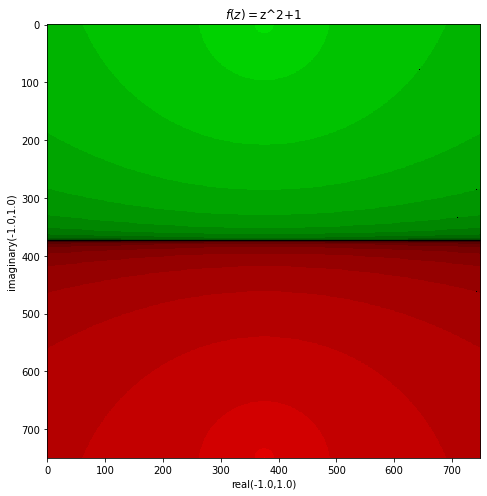

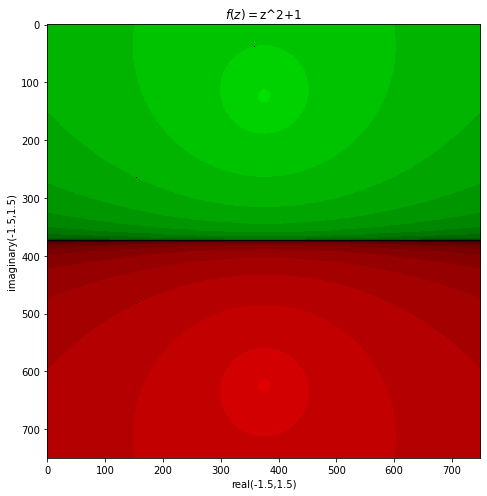

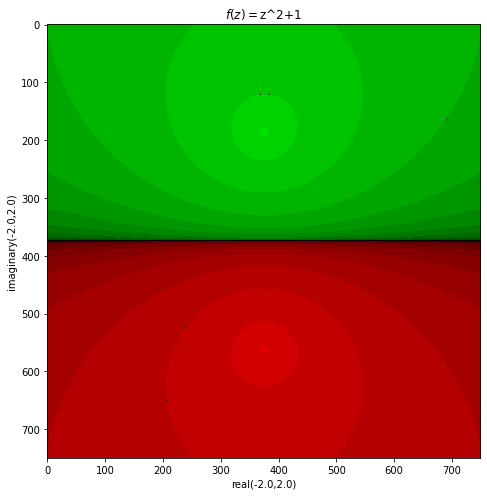

In [33]:
def f(z):
    return z*z+1

def df(z):
    return 2*z

display_fractal('z^2+1',complex(0,1),complex(0,-1),1,zoom=1)
display_fractal('z^2+1',complex(0,1),complex(0,-1),1,zoom=2)    
display_fractal('z^2+1',complex(0,1),complex(0,-1),1,zoom=3)
display_fractal('z^2+1',complex(0,1),complex(0,-1),1,zoom=4)


3. Plot the Newton iterates for points on the positive and negative axes for the complex quadratic polynomials in 3. Give an interpretation of the results.
- $z^2$

***Iteración desde z=10.0 + 0.0j y desde z=-10.0 + 0.0j***

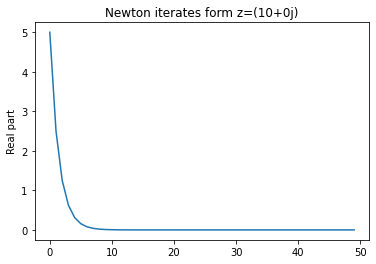

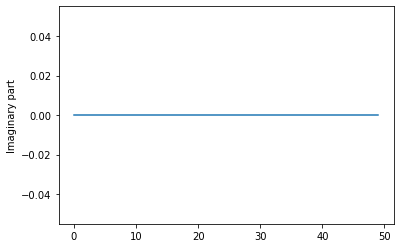

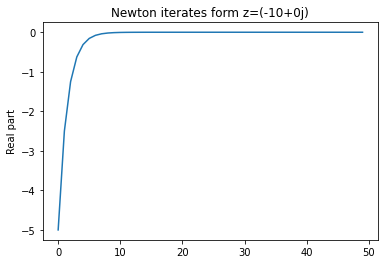

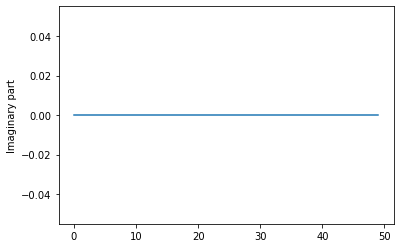

In [35]:


def f(z):
    return z*z

def df(z):
    return 2*z

z=[10.0+0.0j,-10.0+0.0j]
for it in range(2):
    zi = z[it]
    r=[]
    i=[]
    for k in range(50):
        dz = df(zi)
        zi = zi - f(zi) / dz # Newton iteration
        r.append(np.real(zi))
        i.append(np.imag(zi))
    plt.title('Newton iterates form z='+str(z[it]))
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imaginary part')
    plt.show()

Iniciando desde 10 y -10 ambos valores convergen bastante rapido a la solución (0+0i), en un punto cerca a la decima iteración el valor real ya esta bastante cerca. Como se inicio desde valores reales la parte imaginaria en ambos casos no cambia durante el cálculo.

- $ (z-1)^2$

***Iteración desde z=10.0 + 0.0j y desde z=-10.0 + 0.0j***

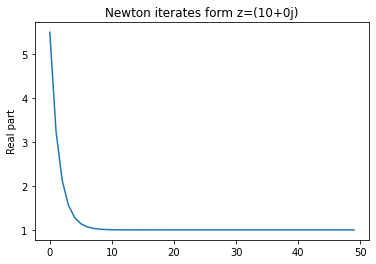

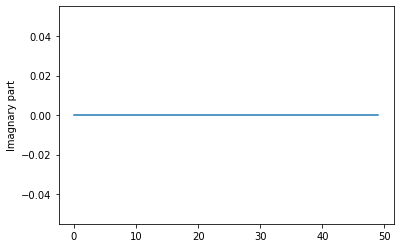

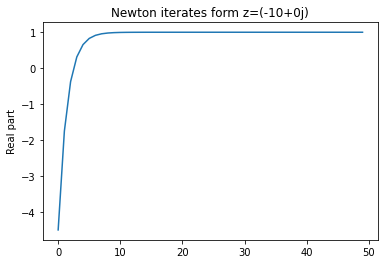

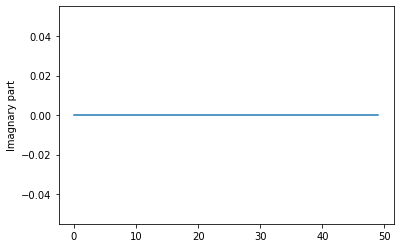

In [36]:
def f(z):
    return z*z-2*z+1

def df(z):
    return 2*z-2

z=[10.0+0.0j,-10.0+0.0j]
for it in range(2):
    zi = z[it]
    r=[]
    i=[]
    for k in range(50):
        dz = df(zi)
        zi = zi - f(zi) / dz # Newton iteration
        r.append(np.real(zi))
        i.append(np.imag(zi))
    plt.title('Newton iterates form z='+str(z[it]))
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imaginary part')
    plt.show()

En este ejemplo existe una sola solución (1+0$i$) para ambos valores iniciales 10 y -10 la solución converge en un poco más de 10 iteraciones, y de hecho en ambos casos, a distancias distintas se converge rapidamente, vemos que el valor $\Delta$ es mucho mayor para las primeras iteraciones y cerca a la solución disminuye. La parte imaginaria, igual que en el ejemplo anterior no cambia durante las iteraciones.
- $z^2-1$

***Iteración desde z=10.0 + 0.0j y desde z=-10.0 + 0.0j***

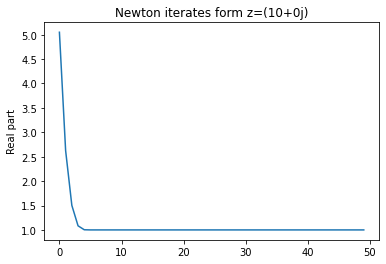

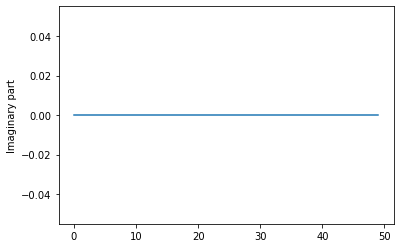

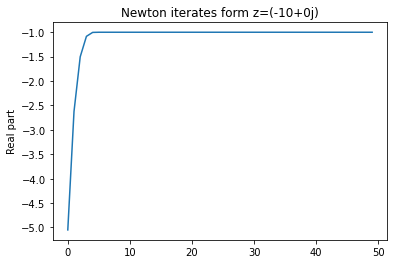

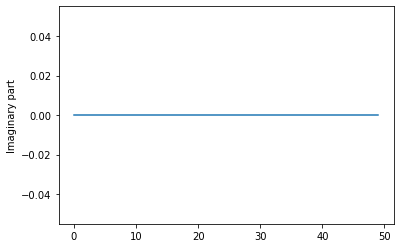

In [37]:
def f(z):
    return z*z-1

def df(z):
    return 2*z

z=[10.0+0.0j,-10.0+0.0j]
for it in range(2):
    zi = z[it]
    r=[]
    i=[]
    for k in range(50):
        dz = df(zi)
        zi = zi - f(zi) / dz # Newton iteration
        r.append(np.real(zi))
        i.append(np.imag(zi))
    plt.title('Newton iterates form z='+str(z[it]))
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imaginary part')
    plt.show()

 Esta vez al haber dos soluciones distintas (1+0$i$ y -1+0$i$), los dos valores iniciales convergen a la solución de su respectivo signo. La velocidad de convergencia es más rapida que para las funciones anteriores, convergiendo tras 5 iteraciones únicamente. De nuevo el valor de la parte imaginaria no cambia durante las iteraciones.
 - $z^2+1$


***Iteración desde z=10.0 + 0.0j y desde z=-10.0 + 0.0j***

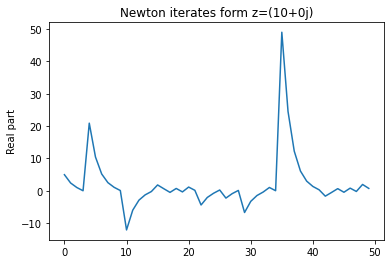

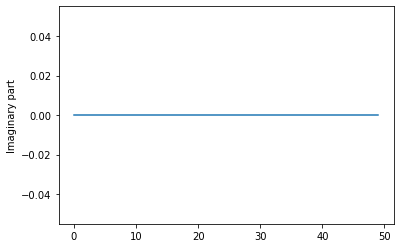

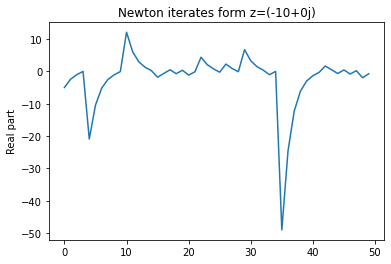

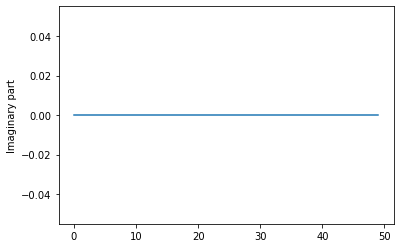

In [38]:
def f(z):
    return z*z+1

def df(z):
    return 2*z

z=[10.0+0.0j,-10.0+0.0j]
for it in range(2):
    zi = z[it]
    r=[]
    i=[]
    for k in range(50):
        dz = df(zi)
        zi = zi - f(zi) / dz # Newton iteration
        r.append(np.real(zi))
        i.append(np.imag(zi))
    plt.title('Newton iterates form z='+str(z[it]))
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imaginary part')
    plt.show()



Este ejemplo es especial porque los dos valores iniciales escogidos no convergen a ninguna de las dos soluciones (0+$i$ y 0-$i$). Como se muestra en el fractal generado, para los valores con parte imaginaria cero el método de Newton-Raphson no llega a las soluciones. Podemos ver que aunque la parte real de los valores si cambia durante las operaciones, la parte imaginaria se mantiene en 0 y por lo tanto nunca converge.

5.Plot he Newton iterates for points on the diagonals in the four quadrants and 0.0 + 0.0j for the complex quadratic polynomials in 3. Give an interpretation of the results.
- $z^2$

***Iteración desde z=10.0 + 0.0j y desde z=-10.0 + 0.0j***

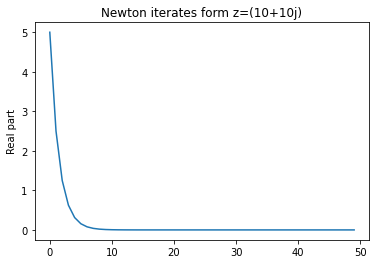

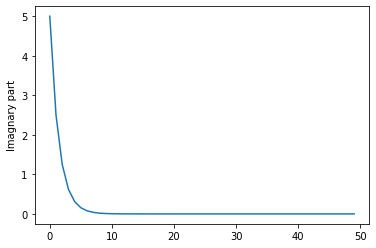

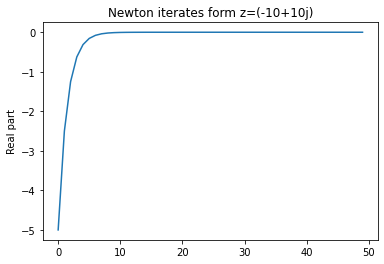

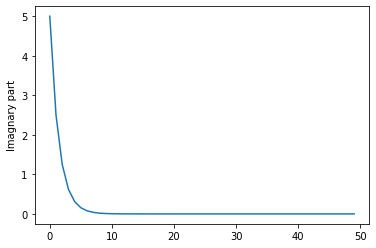

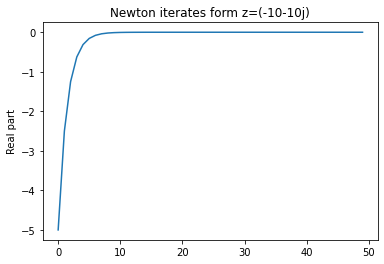

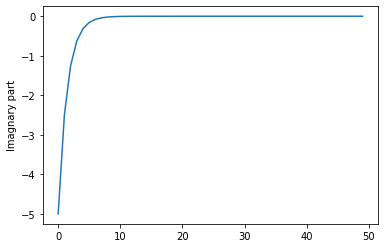

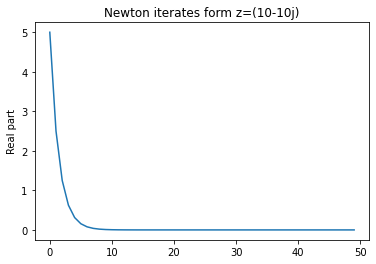

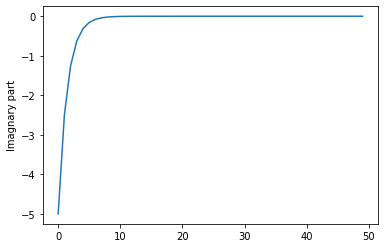

ZeroDivisionError        Traceback (most recent call last)
<ipython-input-39-cd544359031e> in <module>()
     12     for k in range(50):
     13         dz = df(zi)
---> 14         zi = zi - f(zi) / dz # Newton iteration
     15         r.append(np.real(zi))
    16         i.append(np.imag(zi))
ZeroDivisionError: complex division by zero


In [39]:
def f(z):
    return z*z

def df(z):
    return 2*z

z=[10.0+10.0j,-10.0+10.0j,-10.0-10.0j,10.0-10.0j,0.0+0.0j]
for it in range(4):
    zi = z[it]
    r=[]
    i=[]
    for k in range(50):
        dz = df(zi)
        zi = zi - f(zi) / dz # Newton iteration
        r.append(np.real(zi))
        i.append(np.imag(zi))
    plt.title('Newton iterates form z='+str(z[it]))
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imagnary part')
    plt.show()

print("ZeroDivisionError        Traceback (most recent call last)\n<ipython-input-39-cd544359031e> in <module>()\n     12     for k in range(50):\n     13         dz = df(zi)\n---> 14         zi = zi - f(zi) / dz # Newton iteration\n     15         r.append(np.real(zi))\n    16         i.append(np.imag(zi))\nZeroDivisionError: complex division by zero")

Se tienen 5 valores inciales y una sola solución, vemos que en todos los casos los valores convergen en aproximadamente 7-8 iteraciones con excepción del punto 0+0$i$ que al ser la derivada 0 en ese punto presenta un error y no permite el cálculo. Se muestra tambien que en todos los casos la parte imaginaria y real convergen en el mismo número de iteraciones.
- $(z-1)^2$

***Iteración desde z=10.0 + 0.0j y desde z=-10.0 + 0.0j***

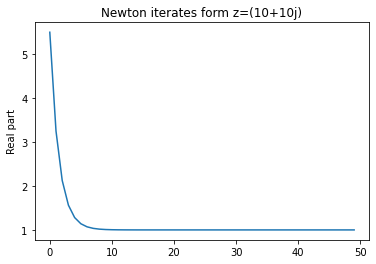

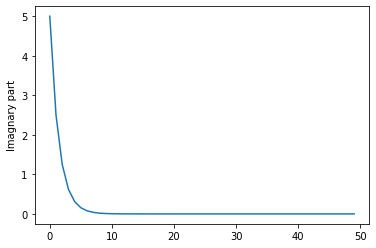

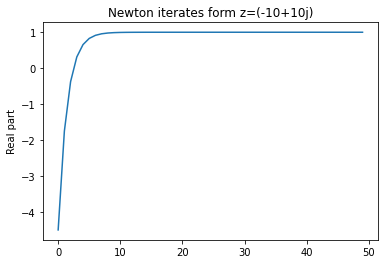

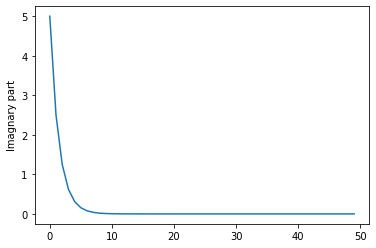

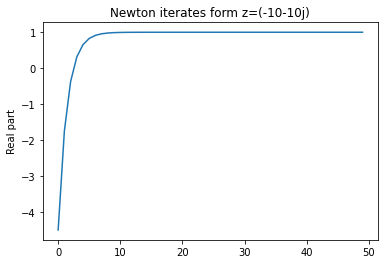

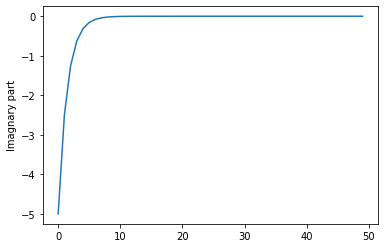

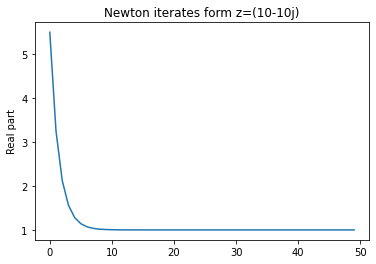

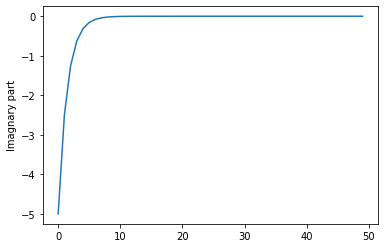

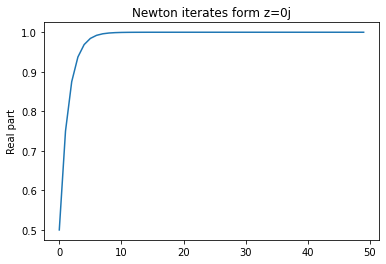

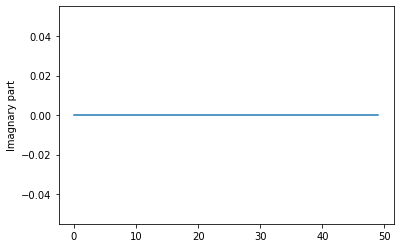

In [40]:
def f(z):
    return z*z-2*z+1

def df(z):
    return 2*z-2

z=[10.0+10.0j,-10.0+10.0j,-10.0-10.0j,10.0-10.0j,0.0+0.0j]
for it in range(5):
    zi = z[it]
    r=[]
    i=[]
    for k in range(50):
        dz = df(zi)
        zi = zi - f(zi) / dz # Newton iteration
        r.append(np.real(zi))
        i.append(np.imag(zi))
    plt.title('Newton iterates form z='+str(z[it]))
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imagnary part')
    plt.show()

Como observamos en la imagenes previas la función converge rapidamente a 1 en la parte real en los ejes con parte real ya que 1 es la unica raiz de esta funcion. Mientras que si empezamos en la parte compleja tiende a 0 ya que no tiene raices en la parte compleja. Al igual los 5 valores escogidos convergen en el mismo número aproximado de iteraciones a la única solución del polinomio (-1+0i) a pesar de estar a diferente distancia del valor de convergencia.
- $z^2-1$

***Iteración desde z=10.0 + 0.0j y desde z=-10.0 + 0.0j***


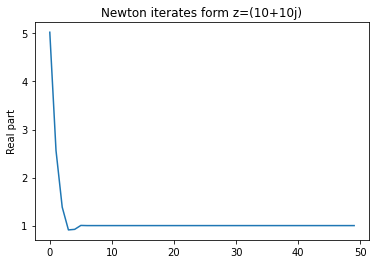

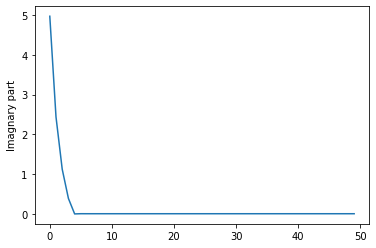

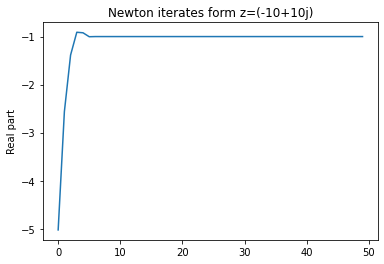

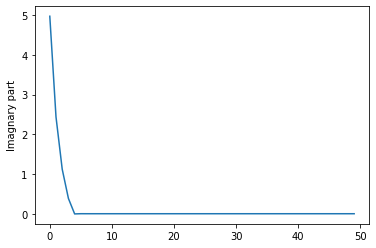

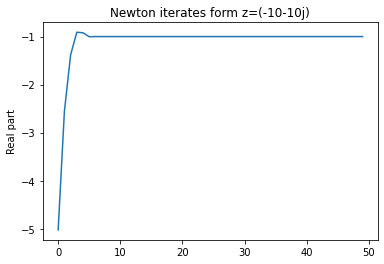

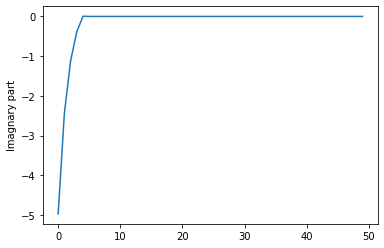

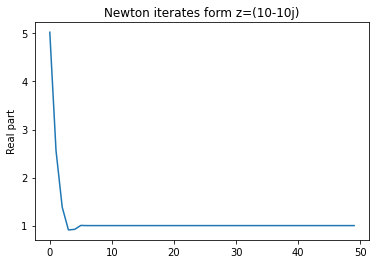

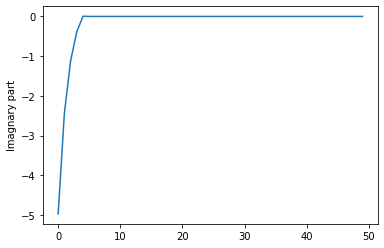

ZeroDivisionError        Traceback (most recent call last)
<ipython-input-39-cd544359031e> in <module>()
     12     for k in range(50):
     13         dz = df(zi)
---> 14         zi = zi - f(zi) / dz # Newton iteration
     15         r.append(np.real(zi))
    16         i.append(np.imag(zi))
ZeroDivisionError: complex division by zero


In [41]:
def f(z):
    return z*z-1

def df(z):
    return 2*z

z=[10.0+10.0j,-10.0+10.0j,-10.0-10.0j,10.0-10.0j,0.0+0.0j]
for it in range(4):
    zi = z[it]
    r=[]
    i=[]
    for k in range(50):
        dz = df(zi)
        zi = zi - f(zi) / dz # Newton iteration
        r.append(np.real(zi))
        i.append(np.imag(zi))
    plt.title('Newton iterates form z='+str(z[it]))
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imagnary part')
    plt.show()

print("ZeroDivisionError        Traceback (most recent call last)\n<ipython-input-39-cd544359031e> in <module>()\n     12     for k in range(50):\n     13         dz = df(zi)\n---> 14         zi = zi - f(zi) / dz # Newton iteration\n     15         r.append(np.real(zi))\n    16         i.append(np.imag(zi))\nZeroDivisionError: complex division by zero")

Como vemos en las graficas si empezamos en los ejes de la parte real tiende a 1 si empieza en el eje real positivo mientras que tiende a -1 si empieza en el eje real negativo, mostrandonos las dos raices de la función.

En los ejes complejos, la parte real se queda quieta ya que al estar en la mitad de las dos raices el algoritmo de Newton no sabe a cual raiz irse, por lo cual en la parte compleja se queda iterando sin llegar a converger a 0.
Para este polinomio con dos raíces distintas vemos que todos menos el punto o+0$i$ convergen, de nuevo en este punto hay un error por la división por 0 debido a la derivada. Se nota que todos los puntos convergen en número menor de iteraciones que para los otros polinomios. Los puntos convergen a la raiz que tenga el mismo signo que su parte real y se evidencia en muchos como en el proceso de convergencia la parte real del valor "se pasa" y luego converge correctamente.
- $z^2+1$

***Iteración desde z=10.0 + 0.0j y desde z=-10.0 + 0.0j***


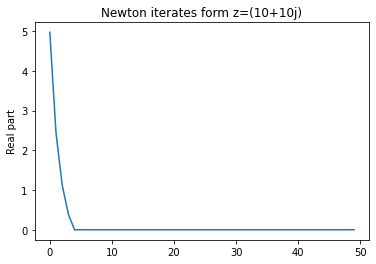

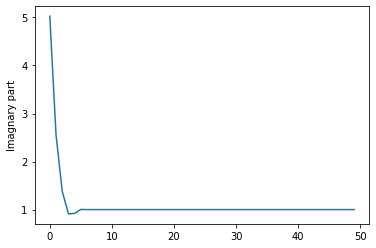

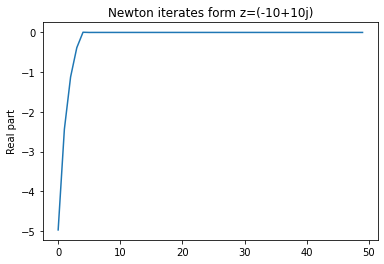

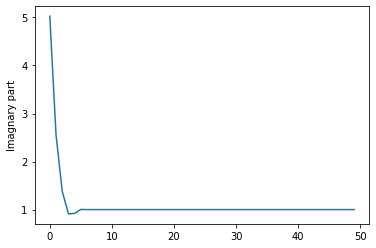

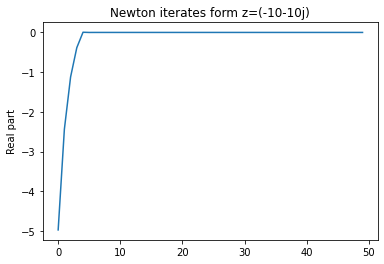

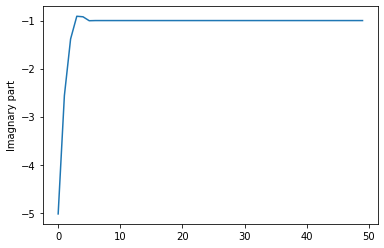

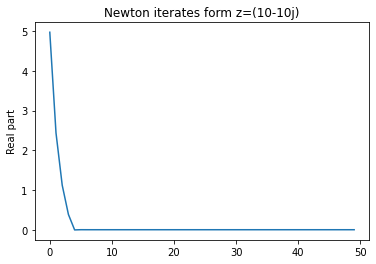

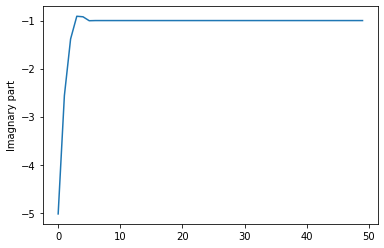

ZeroDivisionError        Traceback (most recent call last)
<ipython-input-39-cd544359031e> in <module>()
     12     for k in range(50):
     13         dz = df(zi)
---> 14         zi = zi - f(zi) / dz # Newton iteration
     15         r.append(np.real(zi))
    16         i.append(np.imag(zi))
ZeroDivisionError: complex division by zero


In [42]:
def f(z):
    return z*z+1

def df(z):
    return 2*z

z=[10.0+10.0j,-10.0+10.0j,-10.0-10.0j,10.0-10.0j,0.0+0.0j]
for it in range(4):
    zi = z[it]
    r=[]
    i=[]
    for k in range(50):
        dz = df(zi)
        zi = zi - f(zi) / dz # Newton iteration
        r.append(np.real(zi))
        i.append(np.imag(zi))
    plt.title('Newton iterates form z='+str(z[it]))
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imagnary part')
    plt.show()

print("ZeroDivisionError        Traceback (most recent call last)\n<ipython-input-39-cd544359031e> in <module>()\n     12     for k in range(50):\n     13         dz = df(zi)\n---> 14         zi = zi - f(zi) / dz # Newton iteration\n     15         r.append(np.real(zi))\n    16         i.append(np.imag(zi))\nZeroDivisionError: complex division by zero")



El comportamiento del valor con respecto al número de iteraciones de este polinomio es similar al anterior, de nuevo todos los valores convergen de manera rápida a una de las dos soluciones expecto por el valor incial 0+0$j$ que no puede ser calculado por el metodo al haber una division por 0.
